# Clustering FIFA
*Sergio Cavero y Javier Yuste*

Siguiendo la línea de los contenidos de la asignatura en torno a técnicas de clustering, decidimos poner en práctica algunos de los conceptos teóricos vistos con un dataset atractivo y amigable. 
Este dataset, con datos de los jugadores de fútbol de todo el mundo, se ha obtenido de [Kaggle](https://www.kaggle.com/karangadiya/fifa19).


###  Descripción del dataset
El dataset contiene la siguiente información sobre los jugadores del videojuego [FIFA 2019](https://www.easports.com/es/fifa)
* row number
* **ID** - unique id for every player
* **Name** - name
* **Age** - age
* **Photo** - url to the player's photo
* **Nationality** - nationality
* **Flag** - url to players's country flag
* **Overall** - overall rating
* **Potential** - potential rating
* **Club** - current club
* **Club Logo** - url to club logo
* **Value** - current market value
* **Wage** - current wage
* **Special** - Preferred Foot
* **left/right** - International Reputation
* **rating on scale of 5** - Weak Foot
* **rating on scale of 5** - Skill Moves
* **rating on scale of 5** - Work Rate
* **attack work rate/defence work rate** - Body Type
* **body type of player** - Real Face
* **Position** - position on the pitch
* **Jersey Number** - jersey number
* **Joined** - joined date
* **Loaned From** - club name if applicable
* **Contract Valid Until** - contract end date
* **Height** - height of the player
* **Weight** - weight of the player
* **LS** - rating on scale of 100
* **ST** - rating on scale of 100
* **RS** - rating on scale of 100
* **LW** - rating on scale of 100
* **LF** - rating on scale of 100
* **CF** - rating on scale of 100
* **RF** - rating on scale of 100
* **RW** - rating on scale of 100
* **LAM** - rating on scale of 100
* **CAM** - rating on scale of 100
* **RAM** - rating on scale of 100
* **LM** - rating on scale of 100
* **LCM** - rating on scale of 100
* **CM** - rating on scale of 100
* **RCM** - rating on scale of 100
* **RM** - rating on scale of 100
* **LWB** - rating on scale of 100
* **LDM** - rating on scale of 100
* **CDM** - rating on scale of 100
* **RDM** - rating on scale of 100
* **RWB** - rating on scale of 100
* **LB** - rating on scale of 100
* **LCB** - rating on scale of 100
* **CB** - rating on scale of 100
* **RCB** - rating on scale of 100
* **RB** - rating on scale of 100
* **Crossing** - rating on scale of 100
* **Finishing** - rating on scale of 100
* **HeadingAccuracy** - rating on scale of 100
* **ShortPassing** - rating on scale of 100
* **Volleys** - rating on scale of 100
* **Dribbling** - rating on scale of 100
* **Curve** - rating on scale of 100
* **FKAccuracy** - rating on scale of 100
* **LongPassing** - rating on scale of 100
* **BallControl** - rating on scale of 100
* **Acceleration** - rating on scale of 100
* **SprintSpeed** - rating on scale of 100
* **Agility** - rating on scale of 100
* **Reactions** - rating on scale of 100
* **Balance** - rating on scale of 100
* **ShotPower** - rating on scale of 100
* **Jumping** - rating on scale of 100
* **Stamina** - rating on scale of 100
* **Strength** - rating on scale of 100
* **LongShots** - rating on scale of 100
* **Aggression** - rating on scale of 100
* **Interceptions** - rating on scale of 100
* **Positioning** - rating on scale of 100
* **Vision** - rating on scale of 100
* **Penalties** - rating on scale of 100
* **Composure** - rating on scale of 100
* **Marking** - rating on scale of 100
* **StandingTackle** - rating on scale of 100
* **SlidingTackle** - rating on scale of 100
* **GKDiving** - rating on scale of 100
* **GKHandling** - rating on scale of 100
* **GKKicking** - rating on scale of 100
* **GKPositioning** - rating on scale of 100
* **GKReflexes** - rating on scale of 100
* **Release Clause** - release clause value



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

A continuación, configuramos las gráficas de *pyplot* y procedemos a cargar y visualizar el fichero que contiene los datos

In [0]:
# COnfiguración de las gráficas de pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [0]:
#Carga y visualización del fichero
df = pd.read_csv(r"data.csv")
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


##Preparación de los datos
Con el método *describe* podemos echar un vistazo a algunas estadísticas de los datos que hemos cargado, tales como la **media**. Por ejemplo, en nuestro *dataset* concreto podemos observar que tenemos 18207 filas de datos y que la media de edad de los jugadores es de 25.12 años

In [0]:
# Análisis rápido sobre los datos a analizar
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


A pesar de que se puede trabajar con datos que tienen *n* atributos, esto nos impediría representar la distribución de dichos datos de forma visual, ya que tendríamos que representarlos en **espacios *n*-dimensionales**. Por ello, nos limitaremos a trabajar aquí con tres atributos, **edad**, **valoración global** y **resistencia**. A continuación, creamos un nuevo dataset con estos tres atributos.

In [0]:
# Creamos un nuevo dataset con las columnas que queremos trabajar
df_to_cluster = df[["Age","Overall","Stamina"]]
df_to_cluster.head(2)

,Age,Overall,Stamina
0,31,94,72.0
1,33,94,88.0


Los datos *nulos* nos darán problemas para trabajar más adelante. Como podemos observar a continuación, nuestro *dataset* no está libre de ellos.

In [0]:
# Comprobamos que no hay valores nulos (NaN)
null_columns=df_to_cluster.columns[df_to_cluster.isnull().any()]
df_to_cluster[null_columns].isnull().sum()

Stamina    48
dtype: int64

Por ello, vamos a eliminar las filas que contengan valores *nulos* en alguna de las columnas.

In [0]:
# Eliminamos todas las filas que tengan valores nulos
df_to_cluster_clean = df_to_cluster.dropna()
null_columns=df_to_cluster_clean.columns[df_to_cluster_clean.isnull().any()]
df_to_cluster_clean[null_columns].isnull().sum()

Series([], dtype: float64)

In [0]:
df_to_cluster_clean.size
df_to_cluster_clean.head()

,Age,Overall,Stamina
0,31,94,72.0
1,33,94,88.0
2,26,92,81.0
3,27,91,43.0
4,27,91,90.0


Convertiremos nuestro dataset, con la ayuda de *numpy*, a un array con el que trabajar con mayor comodidad.

In [0]:
# Convertimos el dataset en un array para poder trabajar con los datos facilmente y poder representarlos
data = np.array(df_to_cluster_clean[["Age","Overall","Stamina"]])

Ahora ya estamos preparados para trabajar con el dataset limpio y representar los clústers. Primeramente, vamos a ver cómo están distribuidos los datos en el espacio tridimensional que comprende a los tres atributos que nos hemos quedado.

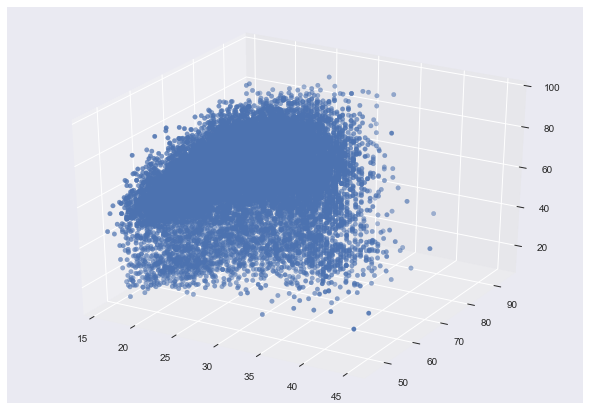

In [0]:
# Grafico en 3D de todos los datos del dataset
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2],s=20)

## Método del codo
Antes de representar nuestros datos en clústers, será necesario que respondamos a una pregunta de vital importancia, ¿cuántos clústers necesitamos? Aunque no existe una fórmula que nos de el número exacto de clústers que necesitamos o que debemos usar, sí podemos estimar la elección óptima mediante el [***método del codo***](https://en.wikipedia.org/wiki/Elbow_method_(clustering), de forma similar a las curvas ROC que se utilizan en el análisis del rendimiento de sistemas de detección de *malware*. 

Mediante este ***método del codo*** podemos observar el nivel de varianza de los datos dentro de los clústers dependiendo del número de clústers usado. El número óptimo de clústers será aquel cuyo incremento no nos suponga una reducción significativa de los datos que los componen. O, dicho de otro modo, el número de clústers para el que la siguiente gráfica se estabiliza. 


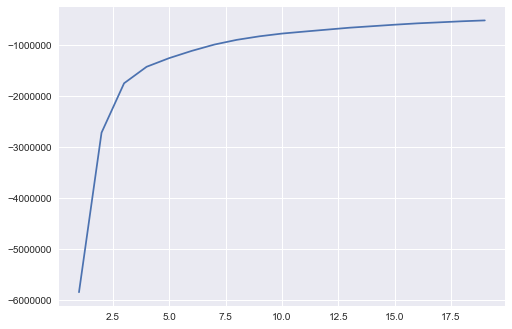

In [0]:
# Creamos la gráfica para realizar el método del codo. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.show()

En este caso particular, separaremos los datos en 5 clústers.

## K-means
[K-medias](https://en.wikipedia.org/wiki/K-means_clustering) es un método de agrupamiento que tiene como objetivo la partición de un conjunto de *n* observaciones en *k* grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. 

Dicho de manera más sencilla, lo que hacemos con el método *k-medias* es agrupar nuestros datos en 5 grupos (*k*=5 en nuestro caso, ya que hemos elegido hacer 5 clústers), de forma que maximicemos la separación de dichos grupos.

In [0]:
 # Calculamos el cluster
kmeans = KMeans(n_clusters=5).fit(data)
result= kmeans.labels_
print(result)

[3 3 3 ... 0 0 0]


A continuación, representaremos los 5 clústers por colores. Como se puede apreciar, la distribución es la misma que vimos anteriormente, con la salvedad de que ahora los datos están coloreados según el clúster al que pertenecen.

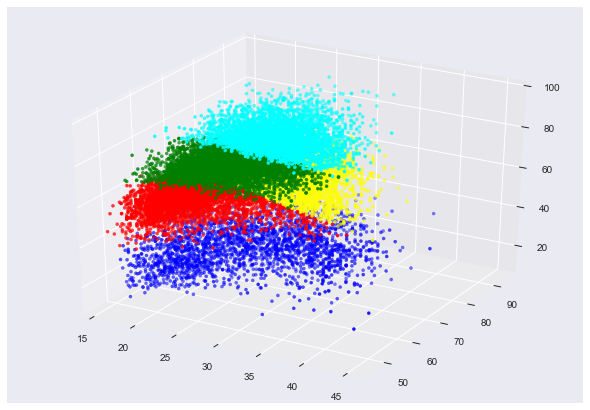

In [0]:
 # Representamos y coloreamos el cluster en función de los agrupamientos.
cl = kmeans.predict(data)
centros = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in cl:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=asignar,s=10)
ax.scatter(centros[:, 0], centros[:, 1], centros[:, 2], marker='*', c=colores, s=100)

### Centroides
Como datos curiosos, podemos obtener los jugadores más representativos de cada clúster, es decir, los más cercanos al centroide de cada agrupamiento.

In [0]:
# Obtenemos los puntos más cercanos a los centroides de cada cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data)
closest

array([15347, 10972, 11348,  3328,  3985], dtype=int64)

In [0]:
# Imprimimos la información de los jugadores más cercanos
for row in closest:
    print(df.loc[row, ["Name", "Age", "Overall"]])

Name       S. Sosa
Age             19
Overall         59
Name: 15347, dtype: object
Name       B. Kwiecień
Age                 24
Overall             64
Name: 10972, dtype: object
Name       S. Ichazo
Age               26
Overall           64
Name: 11348, dtype: object
Name       E. Stevens
Age                27
Overall            72
Name: 3328, dtype: object
Name       A. Caracciolo
Age                   28
Overall               71
Name: 3985, dtype: object


# Parte 2: jugadores españoles mayores de 20
En esta segunda parte, trabajaremos únicamente con los jugadores españoles mayores de 20. De este modo, al reducir el número de datos, podremos visualizar representaciones más vistosas de los clústers.

In [0]:
########### PARTE 2 #########################

# Filtrado de los jugadores: españoles de más de 20 años. 
df_filtered = df[(df["Age"]>20) & (df["Nationality"]=="Spain")]
df_filtered.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
20,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
30,30,197781,Isco,26,https://cdn.sofifa.org/players/4/19/197781.png,Spain,https://cdn.sofifa.org/flags/45.png,88,91,Real Madrid,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
49,49,189332,Jordi Alba,29,https://cdn.sofifa.org/players/4/19/189332.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,€77.9M
54,54,152729,Piqué,31,https://cdn.sofifa.org/players/4/19/152729.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,€69.7M
67,67,189509,Thiago,27,https://cdn.sofifa.org/players/4/19/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,FC Bayern München,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,€75.1M
69,69,184432,Azpilicueta,28,https://cdn.sofifa.org/players/4/19/184432.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Chelsea,...,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,€64.8M
76,76,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M


Los tres atributos en los que nos centraremos serán la **fuerza**, la **agresividad** y la **agilidad** de los jugadores.

In [0]:
# Analizaremos la fuerza, aagresión y agilidad. 
df_to_cluster = df_filtered[["Strength", "Aggression", "Agility"]]
df_to_cluster.describe()

,Strength,Aggression,Agility
count,917.000000,917.000000,917.000000
mean,65.563795,58.141767,64.458015
std,11.743693,17.852304,13.712967
min,28.000000,13.000000,22.000000
25%,59.000000,46.000000,57.000000
50%,67.000000,61.000000,66.000000
75%,73.000000,72.000000,74.000000
max,93.000000,93.000000,94.000000


In [0]:
data = np.array(df_filtered[["Strength", "Aggression", "Agility"]])
data

array([[64., 38., 60.],
       [83., 88., 78.],
       [52., 57., 92.],
       ...,
       [55., 24., 30.],
       [51., 17., 23.],
       [69., 45., 44.]])

Como se puede ver, al reducir el número de datos podemos ver distribuciones más perfiladas, menos compactas.

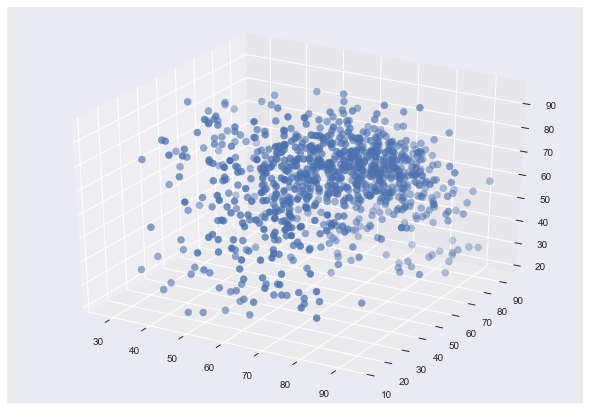

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2],s=50)

## Método del codo
De nuevo, volvemos a servirnos del ***método del codo*** para elegir el número de clústers, que será 4 en este caso.

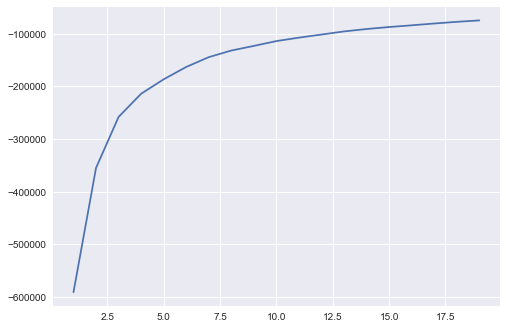

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.show()

Podemos pintar un array que nos indica el clúster al que pertenece cada jugador.

In [0]:
kmeans = KMeans(n_clusters=4).fit(data)
result= kmeans.labels_
print(result)

[0 1 2 1 2 1 3 2 1 2 2 1 1 1 3 1 2 1 2 0 3 1 1 0 1 2 3 1 1 1 2 0 3 2 0 1 0
 1 2 1 2 2 2 1 3 2 3 1 3 0 1 1 1 2 1 1 2 1 1 2 2 2 2 1 2 1 1 0 1 1 2 2 1 1
 1 2 2 0 2 1 1 3 1 1 1 1 0 2 2 0 1 3 1 1 1 0 2 1 1 1 3 1 1 1 1 2 1 1 1 1 3
 0 0 1 0 1 1 0 1 1 2 1 2 1 3 3 3 1 1 2 1 0 1 2 3 1 1 3 1 1 3 0 1 1 3 1 2 3
 3 0 1 0 3 3 1 2 3 1 1 1 1 1 1 1 2 1 0 3 1 2 1 1 1 1 2 3 2 0 1 1 1 3 1 0 2
 0 3 1 0 1 1 1 1 1 1 2 0 1 1 2 3 1 1 2 2 3 2 1 3 1 1 0 2 1 1 2 1 3 2 0 1 0
 2 2 1 0 1 3 2 1 1 1 1 2 3 1 1 2 1 0 2 1 3 1 1 1 1 1 1 3 1 2 3 2 1 1 3 2 3
 1 1 1 1 1 1 2 2 0 0 3 3 3 1 3 1 1 2 2 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2
 1 2 1 3 1 2 1 1 0 3 2 2 1 1 1 3 1 2 0 2 2 3 1 1 1 1 3 1 3 0 3 2 1 2 1 3 2
 0 2 1 2 1 0 1 2 1 2 3 1 3 1 2 1 2 2 1 1 1 1 3 3 3 0 1 2 1 2 3 1 0 3 0 0 3
 1 1 1 1 1 3 1 1 1 0 0 1 1 1 2 2 0 2 3 1 3 1 3 3 3 3 3 1 3 3 1 1 2 1 1 1 3
 1 3 3 2 1 1 2 1 2 2 1 3 2 2 0 1 1 3 0 1 1 1 1 1 1 1 1 1 1 2 0 3 3 3 1 1 2
 1 3 1 1 0 0 1 0 2 3 1 1 3 1 1 1 3 1 2 1 2 2 2 2 1 3 0 3 1 2 0 1 1 2 1 1 3
 1 1 1 3 1 1 2 2 1 2 1 1 

## Representación de los clúster
A continuación, realizaremos varias representaciones visuales de los datos según el clúster al que pertenecen.

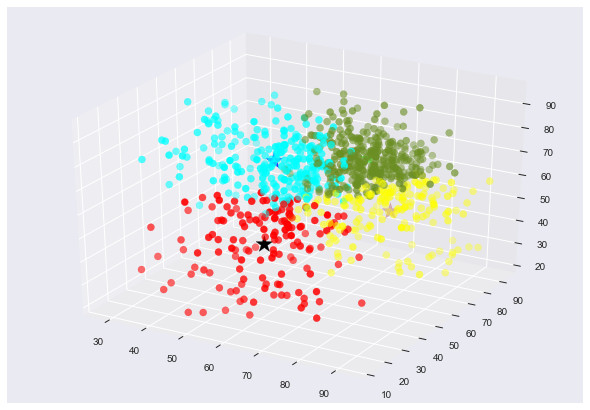

In [0]:
cl = kmeans.predict(data)
centros = kmeans.cluster_centers_
colores=['red','olivedrab','cyan','yellow']
cs = ["black", "lime", "blue", "brown"]
asignar=[]
for row in cl:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=asignar,s=50)
ax.scatter(centros[:, 0], centros[:, 1], centros[:, 2], marker='*', c=cs, s=300)

Además, podemos representarlos usando un plano de dos dimensiones y utilizando como coordenadas únicamente dos atributos. De este modo, podemos visualizar *slices* o cortes del plano tridimensional. A continuación, vemos los datos según **agresividad** y **fuerza**.

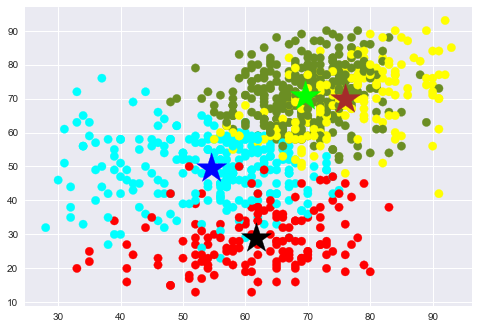

In [0]:
# Representamos en dos dimensiones las 3 posibles combinaciones para estudiar detalladamente cada cluster. 
f1 = df_to_cluster['Strength'].values
f2 = df_to_cluster['Aggression'].values
C = kmeans.cluster_centers_
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=cs, s=1000)
plt.show()

Según **agilidad** y **fuerza**.

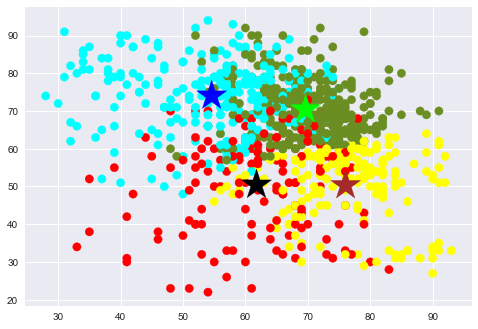

In [0]:
f1 = df_to_cluster['Strength'].values
f2 = df_to_cluster['Agility'].values
C = kmeans.cluster_centers_
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=cs, s=1000)
plt.show()

Y, en tercer lugar, según **agresividad** y **agilidad**, donde se puede apreciar la separación con facilidad.

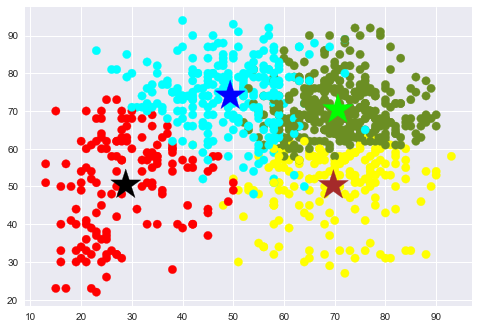

In [0]:
f1 = df_to_cluster['Aggression'].values
f2 = df_to_cluster['Agility'].values
C = kmeans.cluster_centers_
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=cs, s=1000)
plt.show()

## Centroides
Por último, podemos ver qué jugadores son los más representativos de cada clúster. Es decir, qué jugadores se aproximan en mayor medida al centroide de cada clúster.

In [0]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data)
closest

array([696, 609, 737, 125], dtype=int64)

In [0]:
df_to_cluster = df_filtered[["ID","Strength", "Aggression", "Agility"]]
df_to_cluster = df_to_cluster.reset_index(drop=True)
for row in closest:
    idp = df_to_cluster.loc[row, "ID"]
    print(df.loc[df['ID']==idp, "Name"])
    print(df_to_cluster.loc[row, ["Strength", "Aggression", "Agility"]])
    

9218    Basilio
Name: Name, dtype: object
Strength      65.0
Aggression    27.0
Agility       50.0
Name: 696, dtype: float64
7528    Etxeberría
Name: Name, dtype: object
Strength      69.0
Aggression    70.0
Agility       70.0
Name: 609, dtype: float64
10174    Omar Santana
Name: Name, dtype: object
Strength      52.0
Aggression    49.0
Agility       71.0
Name: 737, dtype: float64
845    Sergi Gómez
Name: Name, dtype: object
Strength      78.0
Aggression    70.0
Agility       52.0
Name: 125, dtype: float64
